In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier




In [2]:
df = pd.read_csv('covid_data_balanced_final.csv')

In [3]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [4]:
df.shape


(3754565, 6)

In [5]:
df.corona_result.value_counts()

0    2013800
1    1740765
Name: corona_result, dtype: int64

# Model Building

In [6]:
X = df.drop('corona_result',axis=1)
y = df['corona_result']

In [7]:
X.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: corona_result, dtype: int64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2628195, 5), (1126370, 5), (2628195,), (1126370,))

In [11]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_train_pred = logistic_model.predict(X_train)
y_train_pred_prob = logistic_model.predict_proba(X_train)[:,1]

y_test_pred = logistic_model.predict(X_test)
y_test_pred_prob = logistic_model.predict_proba(X_test)[:,1]


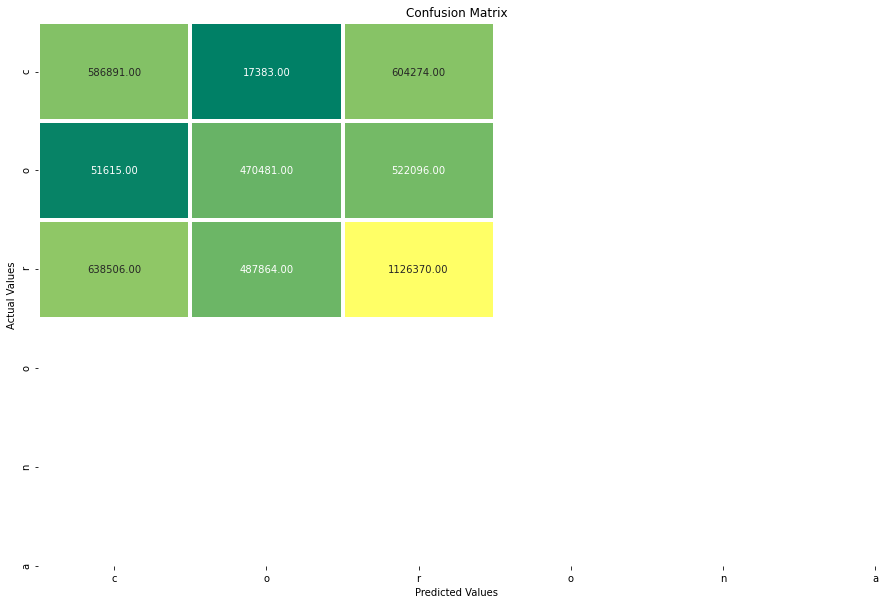

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.92      0.97      0.94    604274
           1       0.96      0.90      0.93    522096

    accuracy                           0.94   1126370
   macro avg       0.94      0.94      0.94   1126370
weighted avg       0.94      0.94      0.94   1126370


************************************Kappa Score************************************


Kappa Score = 0.8762788721212337

******************************Area Under Curve Score******************************


AUC Score = 0.9361860597527305
Number of probabilities to build ROC = 33


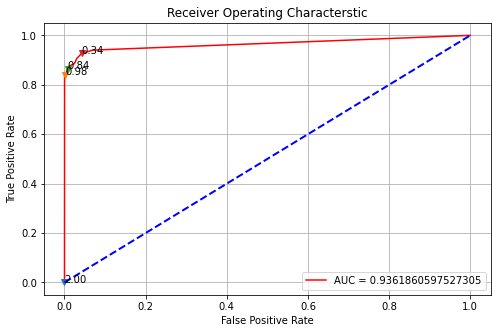

In [44]:
cm = confusion_matrix(y_test,y_test_pred)
row_sum = cm.sum(axis=0)
cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
col_sum = cm.sum(axis=1)
cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()
    
print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
cr = classification_report(y_test,y_test_pred)
print(cr)
    
print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    # Kappa score
kappa = cohen_kappa_score(y_test,y_test_pred) # Kappa Score
print('Kappa Score =',kappa)
    
print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
roc_a = roc_auc_score(y_test,y_test_pred) # Kappa Score
print('AUC Score =',roc_a)
    
    # ROC
plt.figure(figsize=(8,5))
fpr,tpr, thresh = roc_curve(y_test,y_test_pred_prob)
plt.plot(fpr,tpr,'r')
print('Number of probabilities to build ROC =',len(fpr))
verbose = True
n=10
if verbose == True:
    for i in range(len(thresh)):
        if i%n == 0:
            plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
            plt.plot(fpr[i],tpr[i],'v')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic')
plt.legend(['AUC = {}'.format(roc_a)])
plt.plot([0,1],[0,1],'b--',linewidth=2.0)
plt.grid()
plt.show()

In [50]:
abc = []
classifiers =['Logistics Regression','Decision Tree','Random Forest', 'Navie bayes']
models = [LogisticRegression(),DecisionTreeClassifier(random_state=82),RandomForestClassifier(random_state=100),GaussianNB()]

for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe = pd.DataFrame(abc,index=classifiers)
models_dataframe.columns = ['Accuracy']
models_dataframe.sort_values(['Accuracy'],ascending=[0])

,Accuracy
Decision Tree,0.945463
Random Forest,0.945463
Navie bayes,0.940577
Logistics Regression,0.938743


In [51]:
modelRF = RandomForestClassifier(n_estimators=100, random_state=0)
modelRF.fit(X_train,y_train)
predictionRF = modelRF.predict(X_test)
pd.Series(modelRF.feature_importances_,index=X_train.columns).sort_values(ascending=False)

head_ache              0.407803
sore_throat            0.303292
fever                  0.197526
shortness_of_breath    0.080275
cough                  0.011104
dtype: float64

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
kfold = KFold(n_splits=10,random_state=None)

In [54]:
xyz = []
accuracy = []
classifiers =['Logistics Regression','Decision Tree','Random Forest', 'Navie bayes']
models = [LogisticRegression(),DecisionTreeClassifier(random_state=82),RandomForestClassifier(random_state=100),GaussianNB()]

for i in models:
    model = i;
    cv_result = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    
cv_model_dataframe = pd.DataFrame(xyz,index=classifiers)
cv_model_dataframe.columns = ['CV Mean']
cv_model_dataframe
cv_model_dataframe.sort_values(['CV Mean'],ascending=[0])

,CV Mean
Decision Tree,0.945413
Random Forest,0.945413
Navie bayes,0.943484
Logistics Regression,0.936592


In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [56]:
modelDT = DecisionTreeClassifier()
modelRF = RandomForestClassifier()
modelGNB = GaussianNB()
modelLR = LogisticRegression()

In [60]:
ensembleModel = VotingClassifier(estimators=[('Desision Tree', modelDT),
                                            ('Random Forest' , modelRF),
                                             ('Navie Bayes', modelGNB),
                                             ('Logistic Regression' , modelLR)],
                                 voting= 'soft',
                                 weights=None,
                                n_jobs= -1 )   

ensembleModel.fit(X_train,y_train)
predictEnsemble = ensembleModel.predict(X_test)
print('Accuracy of ensamble model with all 4 classifiers is - ' , np.round(ensembleModel.score(X_test,y_test),4))

Accuracy of ensamble model with all 4 classifiers is -  0.9406


In [16]:
# Logistic Regression
ModelLR = LogisticRegression()
ModelLR.fit(X_train,y_train)
y_pred_prob_lr = ModelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# Decision Tree
ModelDT = DecisionTreeClassifier()
ModelDT.fit(X_train,y_train)
y_pred_prob_dt = ModelDT.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
precision_dt, recall_dt, th_dt = precision_recall_curve(y_test, y_pred_prob_dt)

# Random Forest
ModelRF = RandomForestClassifier()
ModelRF.fit(X_train,y_train)
y_pred_prob_rf = ModelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

# Gaussian navie Bayes
ModelGNB = GaussianNB()
ModelGNB.fit(X_train,y_train)
y_pred_prob_gnb = ModelGNB.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_prob_gnb)
roc_auc_gnb = auc(fpr_rf, tpr_rf)
precision_gnb, recall_gnb, th_gnb = precision_recall_curve(y_test, y_pred_prob_gnb)

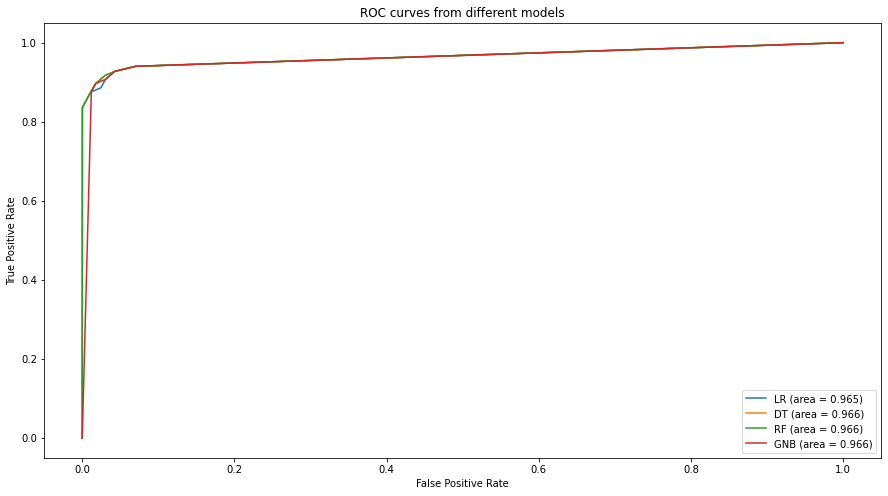

In [69]:
plt.figure(figsize=(15,8))
plt.plot(fpr_lr, tpr_lr, label= 'LR (area = %0.3f)' %roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, label= 'DT (area = %0.3f)' %roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, label= 'RF (area = %0.3f)' %roc_auc_rf)
plt.plot(fpr_gnb, tpr_gnb, label= 'GNB (area = %0.3f)' %roc_auc_gnb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from different models')
plt.legend()
plt.show()

In [10]:
baggingModel = BaggingClassifier(base_estimator=RandomForestClassifier(),
                                  n_estimators=5,  
                                 random_state= 100,
                                 n_jobs= -1
                                )

baggingModel.fit(X_train,y_train)
predictEnsemble = baggingModel.predict(X_test)
print('Accuracy of bagging model with all 5 RF classifiers is - ' , np.round(baggingModel.score(X_test,y_test),4))

Accuracy of bagging model with all 5 RF classifiers is -  0.9455


In [ ]:
#baggingModel2 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=),
#                                  n_estimators=10,  
#                                 random_state= 100,
#                                 n_jobs= -1
                                )

#baggingModel2.fit(X_train,y_train)
#predictEnsemble = baggingModel2.predict(X_test)
#print('Accuracy of bagging model with all 10 RF classifiers is - ' , np.round(baggingModel2.score(X_test,y_test),4))

In [27]:
# Gradient Boost
ModelGB = GradientBoostingClassifier()
ModelGB.fit(X_train,y_train)
y_pred_prob_gb = ModelGB.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test,y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
precision_gb, recall_gb, th_gb = precision_recall_curve(y_test, y_pred_prob_gb)

# Extremet gradient Boost
ModelXGB = XGBClassifier()
ModelXGB.fit(X_train,y_train)
y_pred_prob_xgb = ModelXGB.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test,y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)



[12:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
ModelADA = AdaBoostClassifier()
ModelADA.fit(X_train,y_train)
y_pred_prob_ada = ModelADA.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
precision_ada, recall_ada, th_ada = precision_recall_curve(y_test, y_pred_prob_ada)

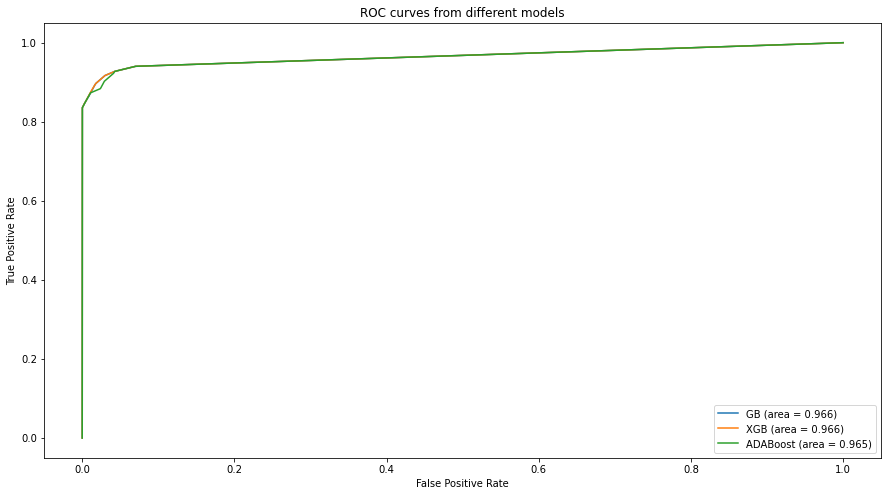

In [30]:
plt.figure(figsize=(15,8))
plt.plot(fpr_gb, tpr_gb, label= 'GB (area = %0.3f)' %roc_auc_gb)
plt.plot(fpr_xgb, tpr_xgb, label= 'XGB (area = %0.3f)' %roc_auc_xgb)
plt.plot(fpr_ada, tpr_ada, label= 'ADABoost (area = %0.3f)' %roc_auc_ada)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from different models')
plt.legend()
plt.show()

In [34]:
pqr = []
classifiers =['Gradient Boosting','Xgboost','ADABoost']
models = [ModelGB,ModelXGB,ModelADA]

for i in models:
    model = i
    #model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    pqr.append(metrics.accuracy_score(prediction,y_test))
models_dataframe_2 = pd.DataFrame(pqr,index=classifiers)
models_dataframe_2.columns = ['Accuracy']
models_dataframe_2.sort_values(['Accuracy'],ascending=[0])

,Accuracy
Gradient Boosting,0.945463
Xgboost,0.945463
ADABoost,0.934402


# Hyperparameter tunning on higher accuracy algorithm

## 1. RF

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [61]:
hyper_parameterRF = {'criterion': ['entropy', 'gini'],
               'max_depth': [3,5,10,15],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8,10],
               'min_samples_split': [5,10,15,20],
               'n_estimators': [20,50,150]}

clfRF = RandomForestClassifier()
modelRFC = RandomizedSearchCV(estimator = clfRF, 
                              param_distributions = hyper_parameterRF,
                              n_iter = 10, 
                               cv = 4, 
                              verbose= 1, 
                              random_state= 101, 
                              n_jobs = -1,
                             scoring = 'accuracy')

modelRFC.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8, 10],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [20, 50, 150]},
                   random_state=101, scoring='accuracy', verbose=1)

In [63]:
print('Training score - ',modelRFC.score(X_train,y_train))
print('Testing score - ',modelRFC.score(X_test,y_test))

Training score -  0.9453914188254676
Testing score -  0.9454628585633496


In [58]:
hyper_parameterDT = {'criterion': ['entropy', 'gini'],
               'max_depth': [3,5,10,15,20,25,30],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8,10,20],
               'min_samples_split': [5,10,15,20,30]
               }

clfDT = DecisionTreeClassifier()
modelDTC = RandomizedSearchCV(estimator = clfDT, 
                              param_distributions = hyper_parameterDT,
                              n_iter = 10, 
                               cv = 4, 
                              verbose= 1, 
                              random_state= 101, 
                              n_jobs = -1,
                             scoring = 'accuracy')

modelDTC.fit(X_train,y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8, 10, 20],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              30]},
                   random_state=101, scoring='accuracy', verbose=1)

In [60]:
print('Training score - ',modelDTC.score(X_train,y_train))
print('Testing score - ',modelDTC.score(X_test,y_test))

Training score -  0.9453914188254676
Testing score -  0.9454628585633496


In [56]:
hyper_parameterGNB = {
                'var_smoothing': np.logspace(0,-9, num=100)
                }

clfGNB = GaussianNB()
modelGNBC = RandomizedSearchCV(estimator = clfGNB, 
                              param_distributions = hyper_parameterGNB,
                              n_iter = 10, 
                              cv = 4, 
                              verbose= 1, 
                              random_state= 95, 
                              n_jobs = -1,
                             scoring = 'accuracy') 

modelGNBC.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=95, scoring='accuracy', verbose=1)

In [57]:
print('Training score - ',modelGNBC.score(X_train,y_train))
print('Testing score - ',modelGNBC.score(X_test,y_test))

Training score -  0.940869303837805
Testing score -  0.9405772525901791


In [64]:
hyper_parameterXGB = {"learning_rate": [0.1, 0.01, 0.001],
    "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
    "max_depth": [2, 4, 10,30, 50],
    "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
    "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [1, 1.5, 2, 3, 4.5],
    "min_child_weight": [1, 3, 5, 7],
    "n_estimators": [50,70,150,200, 250]}

clfXGB = XGBClassifier()
modelXGBC = RandomizedSearchCV(estimator = clfXGB, 
                              param_distributions = hyper_parameterXGB,
                              n_iter = 10, 
                              cv = 4, 
                              verbose= 3, 
                              random_state= 45, 
                              n_jobs = -1,
                             scoring = 'accuracy') 



modelXGBC.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[18:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.6, 0.8,
                                                             1.0],
        

In [65]:
print('Training score - ',modelXGBC.score(X_train,y_train))
print('Testing score - ',modelXGBC.score(X_test,y_test))

Training score -  0.9453914188254676
Testing score -  0.9454628585633496


In [66]:
hyper_parameterADA = {
    'n_estimators': [20,30,50,90,125],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)], # different LR ne try kartoy so that jar adaboost ne better perform kele tar
    'algorithm': ['SAMME', 'SAMME.R']
}


clfADA = AdaBoostClassifier()
modelADAC = RandomizedSearchCV(estimator = clfADA, 
                              param_distributions = hyper_parameterADA,
                              n_iter = 10,  
                              cv = 4, 
                              verbose= 3, 
                              random_state= 72, 
                              n_jobs = -1,
                             scoring = 'accuracy') 



modelADAC.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [20, 30, 50, 90, 125]},
                   random_state=72, scoring='accuracy', verbose=3)

In [67]:
print('Training score - ',modelADAC.score(X_train,y_train))
print('Testing score - ',modelADAC.score(X_test,y_test))

Training score -  0.9383516063305805
Testing score -  0.9381082592753713


DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=30)

In [ ]:
#RF_model = RandomForestClassifier(criterion='entropy', 
                                  max_depth=15, 
                                  max_features='sqrt',
                                   min_samples_leaf=6,
                                  min_samples_split=10,
                                   n_estimators=50)

#DT_model = DecisionTreeClassifier()

In [51]:
def eval_metrics(target,prob,threshold):        
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)

In [110]:
model_prm = [('RF','pred_train','pred_test','pred_prob',modelRFC),
            ('DT','pred_train','pred_test','pred_prob',modelDTC),
            ('GNB','pred_train','pred_test','pred_prob',modelGNBC),
            ('AdaBoost','pred_train','pred_test','pred_prob',modelADAC),
             ('Xgboost','pred_train','pred_test','pred_prob',modelXGBC),
            ]
thre = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for name,pred_train,pred_test,pred_prob,model in model_prm:  
    print('='*25 , 'Model = ', name , '='*25)    
    
    name = model.best_estimator_.fit(X_train,y_train)
    
    pred_train = model.predict(X_train)    
    train_accracy = accuracy_score(y_train,pred_train)  
    
    pred_test = model.predict(X_test)
    test_accracy = accuracy_score(y_test,pred_test)
    print('Training Accuracy - ', train_accracy)
    print('Testing Accuracy - ', test_accracy)

    
    pred_prob = name.predict_proba(X_train)[:,1]
    
    for th in thre:   
        accuracy,precision,recall,f1_score,roc_auc = eval_metrics(y_train,pred_prob,th)
        print('='*25 , 'Threshold = ', th , '='*25)
        print('Accuracy = ',accuracy)
        print('Precision = ',precision)
        print('Recall = ',recall)
        print('f1 score = ',f1_score)
        print('roc auc = ',roc_auc)
        print('='*50)
        print('\n')
    
 

========================= Model =  RF =========================
Training Accuracy -  0.9453914188254676
Testing Accuracy -  0.9454628585633496
========================= Threshold =  0.1 =========================
Accuracy =  0.934619006580562
Precision =  0.9205646337377336
Recall =  0.9401215588482188
f1 score =  0.9302403188011827
roc auc =  0.9349915433830573


========================= Threshold =  0.2 =========================
Accuracy =  0.934619006580562
Precision =  0.9205646337377336
Recall =  0.9401215588482188
f1 score =  0.9302403188011827
roc auc =  0.9349915433830573


========================= Threshold =  0.3 =========================
Accuracy =  0.9434996261692911
Precision =  0.9499062918565143
Recall =  0.9270384329132849
f1 score =  0.9383330564784053
roc auc =  0.9423851614622685


========================= Threshold =  0.4 =========================
Accuracy =  0.9434996261692911
Precision =  0.9499062918565143
Recall =  0.9270384329132849
f1 score =  0.938333056478

KeyboardInterrupt: 

In [111]:
y_train_pred = ModelRF.predict(X_train)
y_train_pred_prob = ModelRF.predict_proba(X_train)[:,1]

y_test_pred = ModelRF.predict(X_test)
y_test_pred_prob = ModelRF.predict_proba(X_test)[:,1]

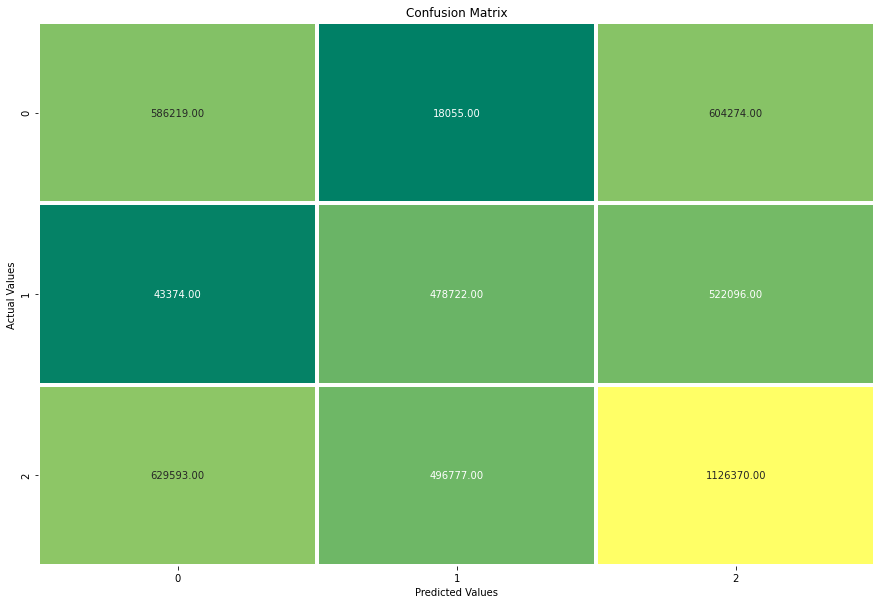

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.93      0.97      0.95    604274
           1       0.96      0.92      0.94    522096

    accuracy                           0.95   1126370
   macro avg       0.95      0.94      0.94   1126370
weighted avg       0.95      0.95      0.95   1126370


************************************Kappa Score************************************


Kappa Score = 0.8899792216840231

******************************Area Under Curve Score******************************


AUC Score = 0.9435222473218522
Number of probabilities to build ROC = 33


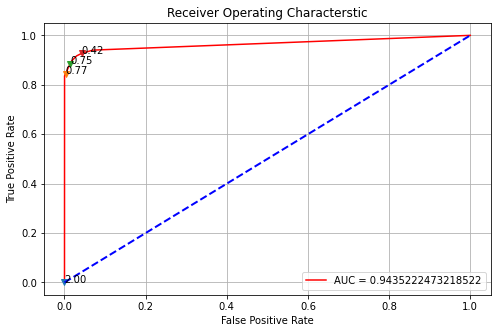

In [113]:
cm = confusion_matrix(y_test,y_test_pred)
row_sum = cm.sum(axis=0)
cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
col_sum = cm.sum(axis=1)
cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',linewidths=3,cbar=None,)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()
    
print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
cr = classification_report(y_test,y_test_pred)
print(cr)
    
print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    # Kappa score
kappa = cohen_kappa_score(y_test,y_test_pred) # Kappa Score
print('Kappa Score =',kappa)
    
print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
roc_a = roc_auc_score(y_test,y_test_pred) # Kappa Score
print('AUC Score =',roc_a)
    
    # ROC
plt.figure(figsize=(8,5))
fpr,tpr, thresh = roc_curve(y_test,y_test_pred_prob)
plt.plot(fpr,tpr,'r')
print('Number of probabilities to build ROC =',len(fpr))
verbose = True
n=10
if verbose == True:
    for i in range(len(thresh)):
        if i%n == 0:
            plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
            plt.plot(fpr[i],tpr[i],'v')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic')
plt.legend(['AUC = {}'.format(roc_a)])
plt.plot([0,1],[0,1],'b--',linewidth=2.0)
plt.grid()
plt.show()

In [114]:
import joblib

In [115]:
filename = 'DT_model.sav'
joblib.dump(ModelDT, filename)

loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9454628585633496


In [116]:
filename = 'RF_model.sav'
joblib.dump(ModelRF, filename)

loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9454628585633496


In [118]:
filename = 'XGB_model.sav'
joblib.dump(ModelXGB, filename)

loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9454628585633496


In [120]:
modelDTC.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=30)